In [33]:
import pandas as pd

# URLs para carregar os dados
bmx_url = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT'
demo_url = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT'

# Carregar os arquivos .XPT
body_measures_data = pd.read_sas(bmx_url)
demographic_data = pd.read_sas(demo_url)

# Exibir as primeiras linhas dos datasets
print(body_measures_data.head())
print(demographic_data.head())


      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  83732.0       1.0   94.8    NaN       NaN       NaN      NaN      NaN   
1  83733.0       1.0   90.4    NaN       NaN       NaN      NaN      NaN   
2  83734.0       1.0   83.4    NaN       NaN       NaN      NaN      NaN   
3  83735.0       1.0  109.8    NaN       NaN       NaN      NaN      NaN   
4  83736.0       3.0   55.2    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  BMXSAD1  BMXSAD2  \
0  184.5    NaN  ...     35.9      NaN     101.1       NaN     22.9     22.7   
1  171.4    NaN  ...     33.2      NaN     107.9       NaN     27.5     27.1   
2  170.1    NaN  ...     31.0      NaN     116.5       NaN     26.7     26.5   
3  160.9    NaN  ...     38.3      NaN     110.1       NaN     25.2     25.0   
4  164.9    NaN  ...     27.2      NaN      80.4       NaN      NaN      NaN   

   BMXSAD3  BMXSAD4  BMDAVSAD  BMDSADCM  
0      NaN      NaN 

In [46]:
# Merge dos dados
merged_data = pd.merge(demographic_data, body_measures_data, on='SEQN')

# Exibir as primeiras linhas do DataFrame mesclado
print(merged_data.head())


      SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  83732.0       9.0       2.0       1.0      62.0       NaN       3.0   
1  83733.0       9.0       2.0       1.0      53.0       NaN       3.0   
2  83734.0       9.0       2.0       1.0      78.0       NaN       3.0   
3  83735.0       9.0       2.0       2.0      56.0       NaN       3.0   
4  83736.0       9.0       2.0       2.0      42.0       NaN       4.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  \
0       3.0       1.0       NaN  ...     35.9      NaN     101.1       NaN   
1       3.0       1.0       NaN  ...     33.2      NaN     107.9       NaN   
2       3.0       2.0       NaN  ...     31.0      NaN     116.5       NaN   
3       3.0       2.0       NaN  ...     38.3      NaN     110.1       NaN   
4       4.0       2.0       NaN  ...     27.2      NaN      80.4       NaN   

   BMXSAD1  BMXSAD2  BMXSAD3  BMXSAD4  BMDAVSAD  BMDSADCM  
0     22.9     22.7      N

In [47]:
# Filtrar dados para participantes entre 20 e 60 anos
filtered_data = merged_data[(merged_data['RIDAGEYR'] >= 20) & (merged_data['RIDAGEYR'] <= 60)]

# Selecionar as colunas de interesse
final_data = filtered_data[['RIDAGEYR', 'BMXWAIST', 'BMXBMI']]

# Exibir as primeiras linhas do DataFrame final
print(final_data.head())


    RIDAGEYR  BMXWAIST  BMXBMI
1       53.0     107.9    30.8
3       56.0     110.1    42.4
4       42.0      80.4    20.3
9       22.0      86.6    28.0
10      32.0      93.3    28.2


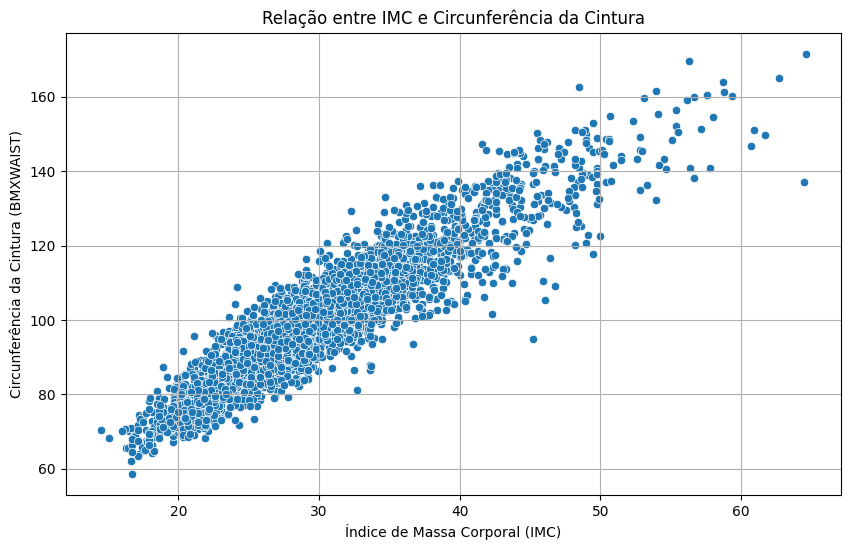

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='BMXBMI', y='BMXWAIST')
plt.title('Relação entre IMC e Circunferência da Cintura')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Circunferência da Cintura (BMXWAIST)')
plt.grid()
plt.show()


In [55]:
# Verificando valores ausentes no DataFrame final
print(final_data.isnull().sum())

# Remover linhas com valores ausentes
final_data_cleaned = final_data.dropna()

# Verifique se ainda há valores ausentes
print(final_data_cleaned.isnull().sum())

# Definindo as variáveis independentes (X) e dependentes (y)
X = final_data_cleaned['BMXBMI']
y = final_data_cleaned['BMXWAIST']

# Adicionando uma constante ao modelo
X = sm.add_constant(X)

# Criando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo o resumo dos resultados do modelo
print(model.summary())


RIDAGEYR      0
BMXWAIST    191
BMXBMI       34
dtype: int64
RIDAGEYR    0
BMXWAIST    0
BMXBMI      0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:               BMXWAIST   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 2.137e+04
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:30:09   Log-Likelihood:                -11829.
No. Observations:                3590   AIC:                         2.366e+04
Df Residuals:                    3588   BIC:                         2.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------